In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.losses import binary_crossentropy
import seaborn
import matplotlib.pyplot as plt
from keras import optimizers
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [2]:
bkgfiles_2016=[#'/scratch/wjin/featurereduced3/bkg/preselection_2016_dyjetsll_slim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2016_gjets_slim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2016_qcd_skim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2016_singletop_skim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2016_tt_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2016_tt_negligible_slim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2016_wjets_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2016_ww_wz_slim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2016_zinv_skim.npy']

bkgfiles_2017=[#'/scratch/wjin/featurereduced3/bkg/preselection_2017_dyjetsll_slim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2017_gjets_slim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2017_qcd_skim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2017_singletop_skim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2017_tt_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2017_tt_negligible_slim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2017_wjets_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2017_ww_wz_slim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2017_zinv_skim.npy']

bkgfiles_2018=[#'/scratch/wjin/featurereduced3/bkg/preselection_2018_dyjetsll_slim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2018_gjets_slim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2018_qcd_skim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2018_singletop_skim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2018_tt_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2018_tt_negligible_slim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2018_wjets_skim.npy',
#'/scratch/wjin/featurereduced3/bkg/preselection_2018_ww_wz_slim.npy',
'/work/wjin/featurereduced4/bkg/preselection_2018_zinv_skim.npy']

sigfiles_T2bb_2016=['/work/wjin/featurereduced4/sig/preselection_2016_T2bb_1_skim.npy',
                     '/work/wjin/featurereduced4/sig/preselection_2016_T2bb_mSbot1650to2600_skim.npy',
                     '/work/wjin/featurereduced4/sig/preselection_2016_T2bb_skim.npy']

sigfiles_T2bb_2017=['/work/wjin/featurereduced4/sig/preselection_2017_T2bb_1_skim.npy',
                     '/work/wjin/featurereduced4/sig/preselection_2017_T2bb_ext1_1_skim.npy',
                     '/work/wjin/featurereduced4/sig/preselection_2017_T2bb_ext1_skim.npy',
                     '/work/wjin/featurereduced4/sig/preselection_2017_T2bb_mSbot1650to2600_ext1_1_skim.npy',
                     '/work/wjin/featurereduced4/sig/preselection_2017_T2bb_mSbot1650to2600_ext1_skim.npy',
                     '/work/wjin/featurereduced4/sig/preselection_2017_T2bb_mSbot1650to2600_skim.npy',
                     '/work/wjin/featurereduced4/sig/preselection_2017_T2bb_skim.npy']

In [3]:
databkg_2016=[]
for i in range(5):
    databkg_2016.append(pd.DataFrame(np.load(bkgfiles_2016[i]).item()))
    databkg_2016[i][b'bkgtype']=i
databkg_2016=pd.concat(databkg_2016,axis=0)

In [ ]:
#databkg_2016=pd.concat([pd.DataFrame(np.load(i).item()) for i in bkgfiles_2016],axis=0)
#datasig_T1bbbb_2016=pd.concat([pd.DataFrame(np.load(i).item()) for i in sigfiles_T1bbbb_2016],axis=0)

In [4]:
datasig_T2bb_2016=pd.concat([pd.DataFrame(np.load(i).item()) for i in sigfiles_T2bb_2016],axis=0)
datasig_T2bb_2016[b'bkgtype']=-1

In [5]:
databkg_2016 = databkg_2016.replace(np.nan, 0)
datasig_T2bb_2016= datasig_T2bb_2016.replace(np.nan,0)

In [6]:
databkg_2016[b'evt_scale1fb'] = databkg_2016[b'evt_scale1fb'].abs()

In [ ]:
datasig_T2bb_2016.shape

In [ ]:
#np.random.seed(123)
#databkg_2016[b'MLtag']=np.random.randint(0,10,databkg_2016.shape[0])
#datasig_T2bb_2016[b'MLtag']=np.random.randint(0,10,datasig_T2bb_2016.shape[0])

In [7]:
databkg_2016_ML=databkg_2016[databkg_2016[b'MLtag']==1]
datasig_T2bb_2016_ML=datasig_T2bb_2016[datasig_T2bb_2016[b'MLtag']==1]

In [8]:
databkg_2016_test=databkg_2016[databkg_2016[b'MLtag']!=1]
datasig_T2bb_2016_test=datasig_T2bb_2016[datasig_T2bb_2016[b'MLtag']!=1]
pd.options.mode.chained_assignment = None
databkg_2016_test[b'sigtag']=0
datasig_T2bb_2016_test[b'sigtag']=1

In [ ]:
#databkg_2016_try=databkg_2016.sample(frac=0.5,replace=True,random_state=13,axis=0)

In [ ]:
#datasig_T1bbbb_2016_try=datasig_T1bbbb_2016.sample(frac=0.5,replace=True,random_state=13,axis=0)

In [9]:
pd.options.mode.chained_assignment = None
databkg_2016_ML[b'sigtag']=0
datasig_T2bb_2016_ML[b'sigtag']=1

In [10]:
data_input=pd.concat([databkg_2016_ML,datasig_T2bb_2016_ML],axis=0)
data_input=data_input.reset_index(drop=True)
del databkg_2016_ML
del datasig_T2bb_2016_ML

In [11]:
features_exclude=[b'nJet30',b'nJet40',b'nBJet20',b'nBJet30',b'nBJet40',b'ht',b'mt2',b'mht_pt',b'met_pt',b'mht_phi',b'met_phi',b'njet']
#features_train=[b'deltaPhiMin',b'diffMetMht',
 #         b'jet1_eta',b'jet1_phi',b'jet1_btagDeepCSV',b'jet2_eta',b'jet2_phi',b'jet2_btagDeepCSV',b'jet3_eta',b'jet3_phi',b'jet3_btagDeepCSV',
  #        b'jet4_eta',b'jet4_phi',b'jet4_btagDeepCSV',b'jet5_eta',b'jet5_phi',b'jet5_btagDeepCSV',b'jet6_eta',b'jet6_phi',b'jet6_btagDeepCSV',
   #       b'jet7_eta',b'jet7_phi',b'jet7_btagDeepCSV',b'jet8_eta',b'jet8_phi',b'jet8_btagDeepCSV',b'jet9_eta',b'jet9_phi',b'jet9_btagDeepCSV',
    #      b'jet10_eta',b'jet10_phi',b'jet10_btagDeepCSV',b'jet11_eta',b'jet11_phi',b'jet11_btagDeepCSV',b'jet12_eta',b'jet12_phi',b'jet12_btagDeepCSV',
     #     b'jet13_eta',b'jet13_phi',b'jet13_btagDeepCSV',b'jet14_eta',b'jet14_phi',b'jet14_btagDeepCSV',b'jet15_eta',b'jet15_phi',b'jet15_btagDeepCSV',
      #    b'jet1_pt',b'jet2_pt',b'jet3_pt',b'jet4_pt',b'jet5_pt',
       #   b'jet6_pt',b'jet7_pt',b'jet8_pt',b'jet9_pt',b'jet10_pt',
        #  b'jet11_pt',b'jet12_pt',b'jet13_pt',b'jet14_pt',b'jet15_pt']

features_train=[b'deltaPhiMin',b'diffMetMht',
           b'jet1_eta',b'jet1_phi',b'jet2_eta',b'jet2_phi',b'jet3_eta',b'jet3_phi',
          b'jet4_eta',b'jet4_phi',b'jet5_eta',b'jet5_phi',b'jet6_eta',b'jet6_phi',
          b'jet7_eta',b'jet7_phi',b'jet8_eta',b'jet8_phi',b'jet9_eta',b'jet9_phi',
          b'jet10_eta',b'jet10_phi',b'jet11_eta',b'jet11_phi',b'jet12_eta',b'jet12_phi',
          b'jet13_eta',b'jet13_phi',b'jet14_eta',b'jet14_phi',b'jet15_eta',b'jet15_phi',
           b'jet1_pt',b'jet2_pt',b'jet3_pt',b'jet4_pt',b'jet5_pt',
              b'jet6_pt',b'jet7_pt',b'jet8_pt',b'jet9_pt',b'jet10_pt',
              b'jet11_pt',b'jet12_pt',b'jet13_pt',b'jet14_pt',b'jet15_pt']

In [12]:
X=data_input[(features_train+[b'evt_scale1fb'])[:]]
y=data_input[b'sigtag']
#X=X.fillna(0,inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=42)

In [14]:
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

In [15]:
X_val=X_val.reset_index(drop=True)
y_val=y_val.reset_index(drop=True)

In [ ]:
X_test

In [16]:
model = Sequential()
#model.add(Dense(1024, activation="relu", input_shape=(X.shape[1],)))
#model.add(Dense(512, activation="relu"))
#model.add(Dense(512, activation="relu"))
#model.add(Dense(256, activation="relu"))
#model.add(Dense(1))
model.add(Dense(512, input_shape=(X[features_train].shape[1],), kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
#model.add(Dense(10, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy',metrics=['accuracy'])
#filepath="weights_T2bb2016_unweighted.best.hdf5"
filepath="weights_T2bb2016_unweighted_btagDeepCSV_excluded_V02.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [17]:
model_history=model.fit(x=X_train[features_train[:]], y=y_train, epochs=100, batch_size=10000,
         validation_data=(X_val[features_train[:]], y_val),callbacks=callbacks_list, verbose=1)
#model.fit(x=X_train[features_train[:]], y=y_train, epochs=10, batch_size=10000)

Train on 448395 samples, validate on 23600 samples
Epoch 1/100
448395/448395 [==============================] - 3s 6us/step - loss: 0.5765 - acc: 0.7481 - val_loss: 0.5607 - val_acc: 0.7502

Epoch 00001: val_acc improved from -inf to 0.75017, saving model to weights_T2bb2016_unweighted_btagDeepCSV_excluded_V02.best.hdf5
Epoch 2/100
448395/448395 [==============================] - 2s 4us/step - loss: 0.5599 - acc: 0.7481 - val_loss: 0.5523 - val_acc: 0.7502

Epoch 00002: val_acc did not improve from 0.75017
Epoch 3/100
448395/448395 [==============================] - 2s 4us/step - loss: 0.5466 - acc: 0.7481 - val_loss: 0.5340 - val_acc: 0.7502

Epoch 00003: val_acc did not improve from 0.75017
Epoch 4/100
448395/448395 [==============================] - 2s 4us/step - loss: 0.5277 - acc: 0.7481 - val_loss: 0.5136 - val_acc: 0.7502

Epoch 00004: val_acc did not improve from 0.75017
Epoch 5/100
448395/448395 [==============================] - 2s 4us/step - loss: 0.5127 - acc: 0.7481 - val_

Epoch 36/100
448395/448395 [==============================] - 2s 4us/step - loss: 0.4612 - acc: 0.7750 - val_loss: 0.4580 - val_acc: 0.7758

Epoch 00036: val_acc did not improve from 0.77623
Epoch 37/100
448395/448395 [==============================] - 2s 4us/step - loss: 0.4563 - acc: 0.7764 - val_loss: 0.4556 - val_acc: 0.7767

Epoch 00037: val_acc improved from 0.77623 to 0.77665, saving model to weights_T2bb2016_unweighted_btagDeepCSV_excluded_V02.best.hdf5
Epoch 38/100
448395/448395 [==============================] - 2s 4us/step - loss: 0.4583 - acc: 0.7764 - val_loss: 0.4554 - val_acc: 0.7779

Epoch 00038: val_acc improved from 0.77665 to 0.77788, saving model to weights_T2bb2016_unweighted_btagDeepCSV_excluded_V02.best.hdf5
Epoch 39/100
448395/448395 [==============================] - 2s 4us/step - loss: 0.4566 - acc: 0.7767 - val_loss: 0.4600 - val_acc: 0.7759

Epoch 00039: val_acc did not improve from 0.77788
Epoch 40/100
448395/448395 [==============================] - 2s 4us

448395/448395 [==============================] - 3s 6us/step - loss: 0.4456 - acc: 0.7815 - val_loss: 0.4518 - val_acc: 0.7781

Epoch 00075: val_acc did not improve from 0.78191
Epoch 76/100
448395/448395 [==============================] - 3s 6us/step - loss: 0.4455 - acc: 0.7817 - val_loss: 0.4579 - val_acc: 0.7777

Epoch 00076: val_acc did not improve from 0.78191
Epoch 77/100
448395/448395 [==============================] - 3s 6us/step - loss: 0.4499 - acc: 0.7805 - val_loss: 0.4501 - val_acc: 0.7785

Epoch 00077: val_acc did not improve from 0.78191
Epoch 78/100
448395/448395 [==============================] - 2s 5us/step - loss: 0.4453 - acc: 0.7818 - val_loss: 0.4508 - val_acc: 0.7804

Epoch 00078: val_acc did not improve from 0.78191
Epoch 79/100
448395/448395 [==============================] - 3s 6us/step - loss: 0.4443 - acc: 0.7817 - val_loss: 0.4490 - val_acc: 0.7797

Epoch 00079: val_acc did not improve from 0.78191
Epoch 80/100
448395/448395 [==============================

In [18]:
model1 = Sequential()
#model.add(Dense(1024, activation="relu", input_shape=(X.shape[1],)))
#model.add(Dense(512, activation="relu"))
#model.add(Dense(512, activation="relu"))
#model.add(Dense(256, activation="relu"))
#model.add(Dense(1))
model1.add(Dense(512, input_shape=(X[features_train].shape[1],), kernel_initializer='normal', activation='relu'))
model1.add(Dense(128, kernel_initializer='normal', activation='sigmoid'))
model1.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
model1.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
#model.add(Dense(10, kernel_initializer='normal', activation='sigmoid'))
model1.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model1.compile(optimizer="adam", loss='binary_crossentropy',metrics=['accuracy'])
model1.load_weights("weights_T2bb2016_unweighted_btagDeepCSV_excluded_V02.best.hdf5")

In [19]:
#model1.save('model_T2bb2016_unweighted.h5')
model1.save("model_T2bb2016_unweighted_btagDeepCSV_excluded_V02.h5")

In [20]:
def plot_history(histories, key_loss='loss',key_metric='acc'):
    fig=plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
    for name, history in histories:
        val_loss = ax1.plot(history.epoch, history.history['val_'+key_loss],
                   '--', label=name.title()+' Val'+' - binary cross entropy')
        ax1.plot(history.epoch, history.history[key_loss], color=val_loss[0].get_color(),
             label=name.title()+' Train'+' - binary cross entropy')
        val_metric=ax2.plot(history.epoch, history.history['val_'+key_metric],
                   '--', label=name.title()+' Val'+' - accuracy')
        ax2.plot(history.epoch, history.history[key_metric], color=val_metric[0].get_color(),
             label=name.title()+' Train'+' - accuracy')
    ax1.set_xlabel('Epochs',fontsize=18)
    ax1.set_ylabel('Loss funtion',fontsize=18)
    ax1.legend(loc='best',prop={'size': 12})
    ax1.set_title("classification learning curve - loss funcion",fontsize=20)
    ax1.set_xlim([0,max(history.epoch)])
    ax2.set_xlabel('Epochs',fontsize=18)
    ax2.set_ylabel('Metric',fontsize=18)
    ax2.legend(loc='best',prop={'size': 12})
    ax2.set_title("classification learning curve - metric",fontsize=20)
    ax2.set_xlim([0,max(history.epoch)])
    return fig

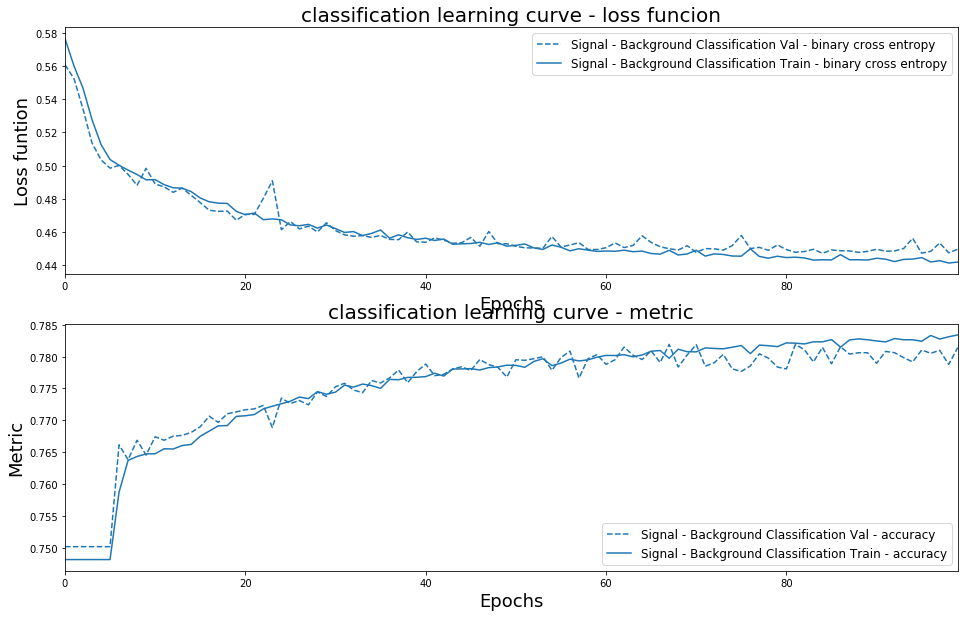

In [22]:
fig=plot_history([('signal - background classification',model_history)])
#fig.savefig('T2bb_unweighted_learningcurve_V02.pdf')
#fig.savefig('T2bb_unweighted_learningcurve_V02.png')
fig.savefig('T2bb_unweighted_learningcurve_btagDeepCSVexcluded_V02.pdf')
fig.savefig('T2bb_unweighted_learningcurve_btagDeepCSVexcluded_V02.png')

In [23]:
results = model1.predict(X_val[features_train[:]], batch_size=10000)

In [24]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val, results,sample_weight=X_val[b'evt_scale1fb'][:])
#auc = roc_auc_score(y_test, results)
print("area under ROC curve: ", auc)

area under ROC curve:  0.8671283525875372


In [25]:
sigtest_score= model1.predict(datasig_T2bb_2016_test[features_train[:]], batch_size=10000)
bkgtest_score= model1.predict(databkg_2016_test[features_train[:]],batch_size=10000)

In [26]:
databkg_2016_test[b'MLscore']=bkgtest_score
datasig_T2bb_2016_test[b'MLscore']=sigtest_score

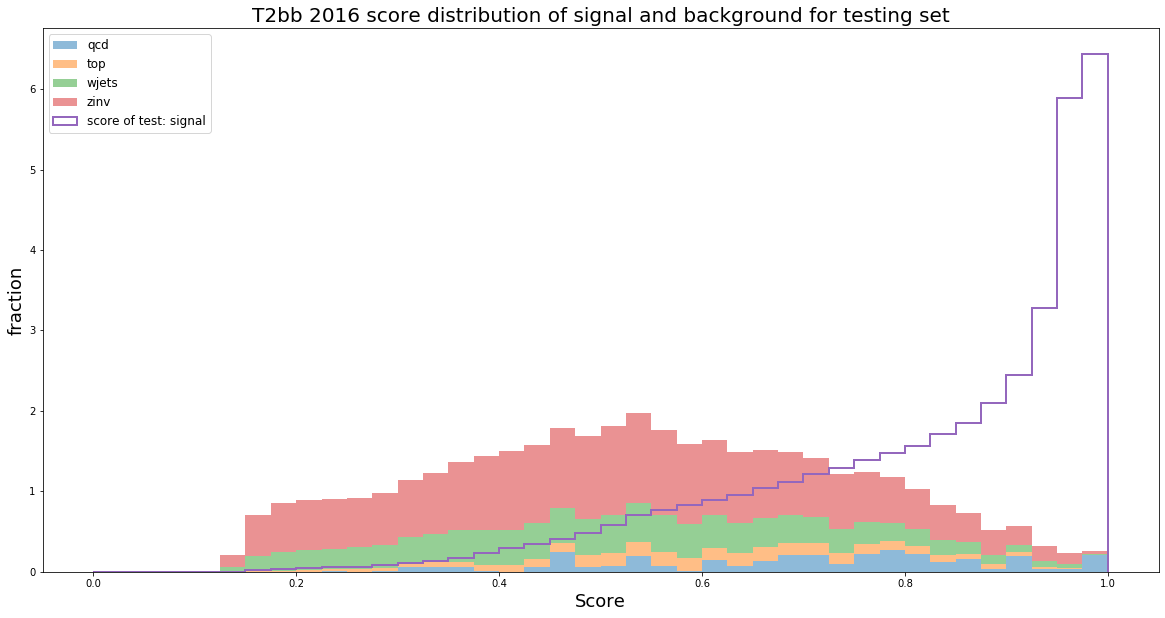

In [28]:
fig3 = plt.figure(figsize=(20,10))
ax3 = fig3.add_subplot(111)
bkgscore=[databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'MLscore'], \
          databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'MLscore'], \
         databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'MLscore'],
         databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'MLscore']]
bkgweight=[databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'evt_scale1fb'], \
          databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'evt_scale1fb'], \
         databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'evt_scale1fb'],
         databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'evt_scale1fb']]
bkgname=['qcd','top','wjets','zinv']
ax3.hist(bkgscore,bins=np.arange(0,1.025,0.025),stacked=True,alpha=0.5,label=bkgname,density=True,weights=bkgweight)
ax3.hist(datasig_T2bb_2016_test[b'MLscore'],bins=np.arange(0,1.025,0.025),alpha=1,label='score of test: signal',density=True,histtype='step',linewidth=2)
ax3.legend(loc='upper left',prop={'size': 12})
ax3.set_title("T2bb 2016 score distribution of signal and background for testing set",fontsize=20)
ax3.set_xlabel('Score',fontsize=18)
ax3.set_ylabel('fraction',fontsize=18)
#fig3.savefig('T2bb_2016_scoredistribution_V02.pdf')
#fig3.savefig('T2bb_2016_scoredistribution_V02.png')
fig3.savefig('T2bb_2016_scoredistribution_btagDeepCSV_excluded_V02.pdf')
fig3.savefig('T2bb_2016_scoredistribution_btagDeepCSV_excluded_V02.png')

In [ ]:
fig1 = plt.figure(figsize=(20,10))
ax0 = fig1.add_subplot(111)
bins=np.histogram(datasig_T2bb_2016_test[b'mt2'],bins=30)[1]
labels=['mt2 of signal T1qqqq before cut','mt2 of signal T1qqqq after cut']
ax0.hist(datasig_T2bb_2016_test[b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
             label=labels[0])
ax0.hist(datasig_T2bb_2016_test[datasig_T2bb_2016_test[b'MLscore']>0.5][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
             label=labels[1])
ax0.legend(loc='best',prop={'size': 12})
ax0.set_yscale('log')
ax0.set_xlabel('mt2',fontsize=18)
ax0.set_ylabel('fraction',fontsize=18)
ax0.set_title('comparison of T2bb signal before and after cut',size=20)
fig1.show()

In [ ]:
fig2 = plt.figure(figsize=(20,10))
ax2 = fig2.add_subplot(111)
bins=np.histogram(databkg_2016_test[b'mt2'],bins=30)[1]
labels=['mt2 of accumulated background before cut','mt2 of accululated background after cut']
ax2.hist(databkg_2016_test[b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[b'evt_scale1fb'],
             label=labels[0])
ax2.hist(databkg_2016_test[databkg_2016_test[b'MLscore']>0.5][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[databkg_2016_test[b'MLscore']>0.5][b'evt_scale1fb'],
             label=labels[1])
ax2.legend(loc='best',prop={'size': 12})
ax2.set_yscale('log')
ax2.set_xlabel('mt2',fontsize=18)
ax2.set_ylabel('fraction',fontsize=18)
ax2.set_title('comparison of total background before and after cut',size=20)
fig2.show()

In [ ]:
fig3 = plt.figure(figsize=(20,10))
ax3 = fig3.add_subplot(111)
bins=np.histogram(databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'mt2'],bins=30)[1]
labels=['mt2 of zinv background before cut','mt2 of zinv background after cut']
ax3.hist(databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[databkg_2016_test[b'bkgtype']==4][b'evt_scale1fb'],
             label=labels[0])
ax3.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==4)][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==4)][b'evt_scale1fb'],
             label=labels[1])
ax3.legend(loc='best',prop={'size': 12})
ax3.set_yscale('log')
ax3.set_xlabel('mt2',fontsize=18)
ax3.set_ylabel('fraction',fontsize=18)
ax3.set_title('comparison of zinv background before and after cut',size=20)
fig3.show()

In [ ]:
fig4 = plt.figure(figsize=(20,10))
ax4 = fig4.add_subplot(111)
bins=np.histogram(databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'mt2'],bins=30)[1]
labels=['mt2 of wjets background before cut','mt2 of wjets background after cut']
ax4.hist(databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[databkg_2016_test[b'bkgtype']==3][b'evt_scale1fb'],
             label=labels[0])
ax4.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==3)][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==3)][b'evt_scale1fb'],
             label=labels[1])
ax4.legend(loc='best',prop={'size': 12})
ax4.set_yscale('log')
ax4.set_xlabel('mt2',fontsize=18)
ax4.set_ylabel('fraction',fontsize=18)
ax4.set_title('comparison of wjets background before and after cut',size=20)
fig4.show()

In [ ]:
fig5 = plt.figure(figsize=(20,10))
ax5 = fig5.add_subplot(111)
bins=np.histogram(databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'mt2'],bins=30)[1]
labels=['mt2 of singletop background before cut','mt2 of singletop background after cut']
ax5.hist(databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[databkg_2016_test[b'bkgtype']==0][b'evt_scale1fb'],
             label=labels[0])
ax5.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==0)][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&(databkg_2016_test[b'bkgtype']==0)][b'evt_scale1fb'],
             label=labels[1])
ax5.legend(loc='best',prop={'size': 12})
ax5.set_yscale('log')
ax5.set_xlabel('mt2',fontsize=18)
ax5.set_ylabel('fraction',fontsize=18)
ax5.set_title('comparison of qcd background before and after cut',size=20)
fig5.show()

In [ ]:
fig7 = plt.figure(figsize=(20,10))
ax7 = fig7.add_subplot(111)
bins=np.histogram(databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'mt2'],bins=30)[1]
labels=['mt2 of singletop background before cut','mt2 of singletop background after cut']
ax7.hist(databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'mt2'],
             bins=bins,density=True,alpha=0.5,color='orange',
         weights=databkg_2016_test[(databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2)][b'evt_scale1fb'],
             label=labels[0])
ax7.hist(databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&((databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2))][b'mt2'],
             bins=bins,density=True,color='b',histtype='step',
         weights=databkg_2016_test[(databkg_2016_test[b'MLscore']>0.5)&((databkg_2016_test[b'bkgtype']==1)|(databkg_2016_test[b'bkgtype']==2))][b'evt_scale1fb'],
             label=labels[1])
ax7.legend(loc='best',prop={'size': 12})
ax7.set_yscale('log')
ax7.set_xlabel('mt2',fontsize=18)
ax7.set_ylabel('fraction',fontsize=18)
ax7.set_title('comparison of top background before and after cut',size=20)
fig7.show()